# Hyperopt-Sklearn: Really Simple Hyperparameter Optimization
by Matthew Emery [@lstmemery]

## What is Hyperparameter Optimization?

- Every choice you make about the machine learning model you use is a hyperparameter
- This includes the choice of model itself or preprocessing steps
- Every dataset will have slightly different optimal hyperparameters

## What makes Hyperparameter Optimization Tough?

- The there a many dimensions in hyperparameter space and an infinite number of values to explore 
- Hyperparameters can interact with each other in unexpected ways
- Evaluating your choice of hyperparameters involves training a new model
- That's computationally expensive

## Types of Hyperparameter Optimization

- Grid Search
- Random Search
- Gaussian Processes
- **Tree-based Parzen Windows (Hyperopt)**

## What is Hyperopt?

- Hyperopt is a tree-based, Bayesian hyperparameter optimization library in Python
- Bayesian: The algorithm tends to get better over time (As opposed to random search)
- Tree-based: The algorithm can model discrete and continuous variables

## What is Hyperopt-Sklearn?

- A wrapper for Hyperopt in scikit-learn
- Checkout my fork of it is here: https://github.com/lstmemery/hyperopt-sklearn

In [68]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns

%matplotlib inline

X, y = load_digits(return_X_y = True)

(train_X, test_X, 
 train_y, test_y) = train_test_split(X, y, 
                                     test_size = 0.2,
                                     random_state = 0)

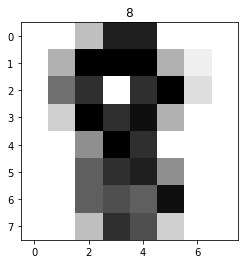

In [26]:
random_image = randint(0, len(train_X))
plt.title(train_y[random_image])
plt.imshow(train_X[random_image].reshape(8, 8), cmap=plt.cm.gray_r)

0.944


/home/deadhead/.local/share/virtualenvs/hyperopt-sklearn-ibqBoFln/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


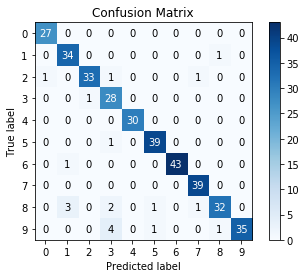

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scikitplot as skplt

model = RandomForestClassifier(random_state = 0)
model.fit(train_X, train_y)
print(accuracy_score(test_y, model.predict(test_X)).round(3))

skplt.metrics.plot_confusion_matrix(test_y, model.predict(test_X))

In [37]:
from hpsklearn import HyperoptEstimator, any_classifier

hyperopt_model = HyperoptEstimator(classifier=any_classifier("mnist"),
                                   max_evals=100,
                                   seed=0)
hyperopt_model.fit(train_X,
              train_y,
              n_folds=5,
              cv_shuffle=True,
              random_state=0)

from sklearn.externals import joblib

joblib.dump(hyperopt_model, "hyperopt_model.pkl")

['hyperopt_model.pkl']

0.989
{'learner': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance'), 'preprocs': (Normalizer(copy=True, norm='l2'),), 'ex_preprocs': ()}


/home/deadhead/.local/share/virtualenvs/hyperopt-sklearn-ibqBoFln/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


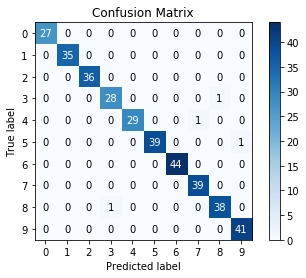

In [76]:
hyperopt_predictions = hyperopt_model.predict(test_X)

print(accuracy_score(test_y, hyperopt_predictions).round(3))
print(hyperopt_model.best_model())
skplt.metrics.plot_confusion_matrix(test_y, hyperopt_predictions)

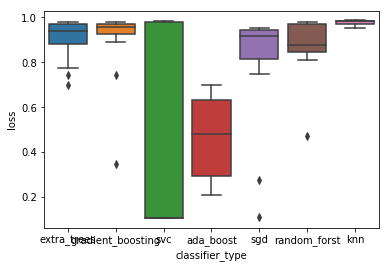

In [77]:
import pandas as pd
from collections import defaultdict

classifier_types = ["svc", "knn", "random_forst", "extra_trees", "ada_boost", "gradient_boosting", "sgd"]

classifier_performance = defaultdict(list)
for index, classifier in enumerate(hyperopt_model.trials.trials):
    classifier_performance["index"].append(index)
    classifier_performance["loss"].append(1 - classifier["result"]["loss"]) # We want accuracy
    classifier_performance["classifier_type"].append(classifier_types[classifier['misc']['vals']["mnist"][0]])

sns.boxplot(x="classifier_type", 
        y="loss", 
        data= pd.DataFrame(classifier_performance))

## Other Features

- Warm